In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


In [2]:
df=pd.read_csv('Cardio_Dataset.csv')
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,TM798,40,Male,21,Single,6,5,83416,200
176,TM798,42,Male,18,Single,5,4,89641,200
177,TM798,45,Male,16,Single,5,5,90886,160
178,TM798,47,Male,18,Partnered,4,5,104581,120


In [5]:
df1=df
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,TM798,40,Male,21,Single,6,5,83416,200
176,TM798,42,Male,18,Single,5,4,89641,200
177,TM798,45,Male,16,Single,5,5,90886,160
178,TM798,47,Male,18,Partnered,4,5,104581,120


In [7]:
df1.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

# Customer Segmentation by Product

In [10]:
## For Numeric Columns
cs = df1.groupby(['Product'])[['Age', 'Income','Fitness']].mean()
print(cs)

## For Categorical Columns
print("\n")
cs = df1.groupby(['Product'])['Gender'].apply(lambda x: x.mode().iloc[0])
print(cs)

print("\n")
cs = df1.groupby(['Product'])['Education'].value_counts()
print(cs)



           Age     Income  Fitness
Product                           
TM195    28.55  46418.025   2.9625
TM498    28.90  48973.650   2.9000
TM798    29.10  75441.575   4.6250


Product
TM195    Female
TM498      Male
TM798      Male
Name: Gender, dtype: object


Product  Education
TM195    16           39
         14           30
         15            4
         13            3
         12            2
         18            2
TM498    16           31
         14           23
         13            2
         18            2
         12            1
         15            1
TM798    18           19
         16           15
         21            3
         14            2
         20            1
Name: count, dtype: int64


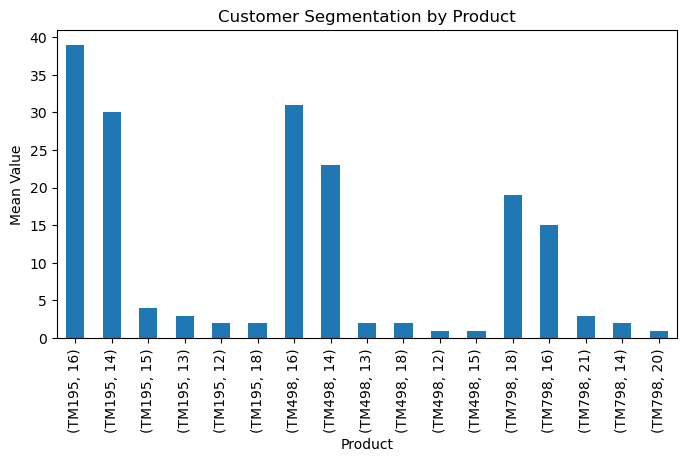

In [70]:
cs.plot(kind='bar',figsize=(8,4))
plt.title("Customer Segmentation by Product")
plt.xlabel("Product")
plt.ylabel("Mean Value")
plt.show()


# Usage Patterns

In [15]:

up = df1.groupby('Product')[['Fitness', 'Miles']].mean()
print(up)

         Fitness       Miles
Product                     
TM195     2.9625   82.787500
TM498     2.9000   87.933333
TM798     4.6250  166.900000


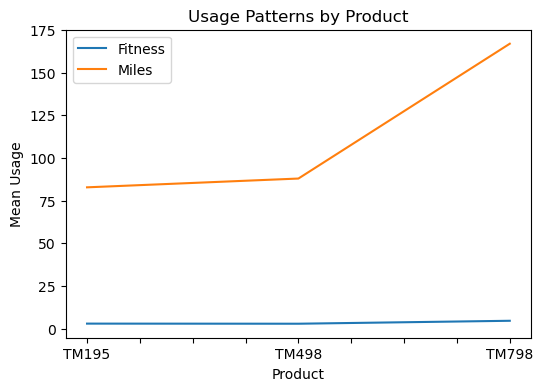

In [17]:
up.plot(figsize=(6,4))
plt.title("Usage Patterns by Product")
plt.xlabel("Product")
plt.ylabel("Mean Usage")
plt.show()


# Fitness and Lifestyle Insights

In [20]:
# LabelEncoder to convert categorical to numerical
le = LabelEncoder()

# transforming  'Product' column
df1['product'] = le.fit_transform(df1['Product'])

fc = df1[['Fitness', 'product']].corr()
print("Fitness-Product Correlation:")
print(fc)


Fitness-Product Correlation:
          Fitness   product
Fitness  1.000000  0.594883
product  0.594883  1.000000


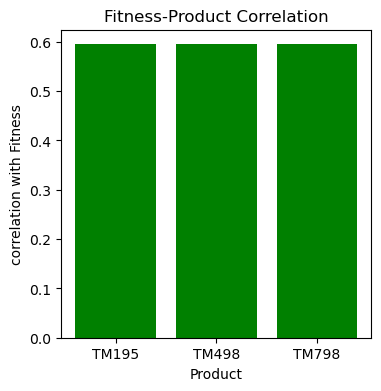

In [22]:
product_labels=df1['Product'].unique()
plt.figure(figsize=(4,4))
plt.bar(product_labels,fc.iloc[0,1:], color='g')
plt.xlabel('Product')
plt.ylabel('correlation with Fitness')
plt.title('Fitness-Product Correlation')
plt.show()




#	Income and Pricing Strategy

In [84]:
print("Income Distribution")
print(df1['Income'].describe())

pi=df1.groupby('Income')['Product'].value_counts()
print("\n  Income by Product is ")
print(pi)

Income Distribution
count       180.000000
mean      53719.577778
std       16506.684226
min       29562.000000
25%       44058.750000
50%       50596.500000
75%       58668.000000
max      104581.000000
Name: Income, dtype: float64

  Income by Product is 
Income  Product
29562   TM195      1
30699   TM195      1
31836   TM195      1
        TM498      1
32973   TM195      3
                  ..
95508   TM798      1
95866   TM798      1
99601   TM798      1
103336  TM798      1
104581  TM798      2
Name: count, Length: 83, dtype: int64


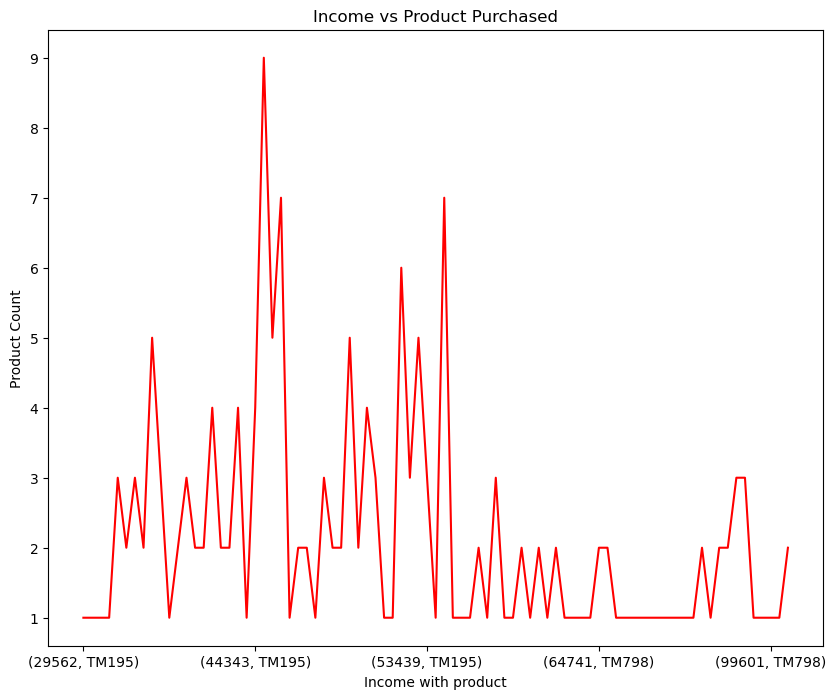

In [82]:
pi.plot(figsize=(10,8),color='red')
plt.title("Income vs Product Purchased")
plt.xlabel('Income with product')
plt.ylabel('Product Count')
plt.show()

# Targeting New Customers

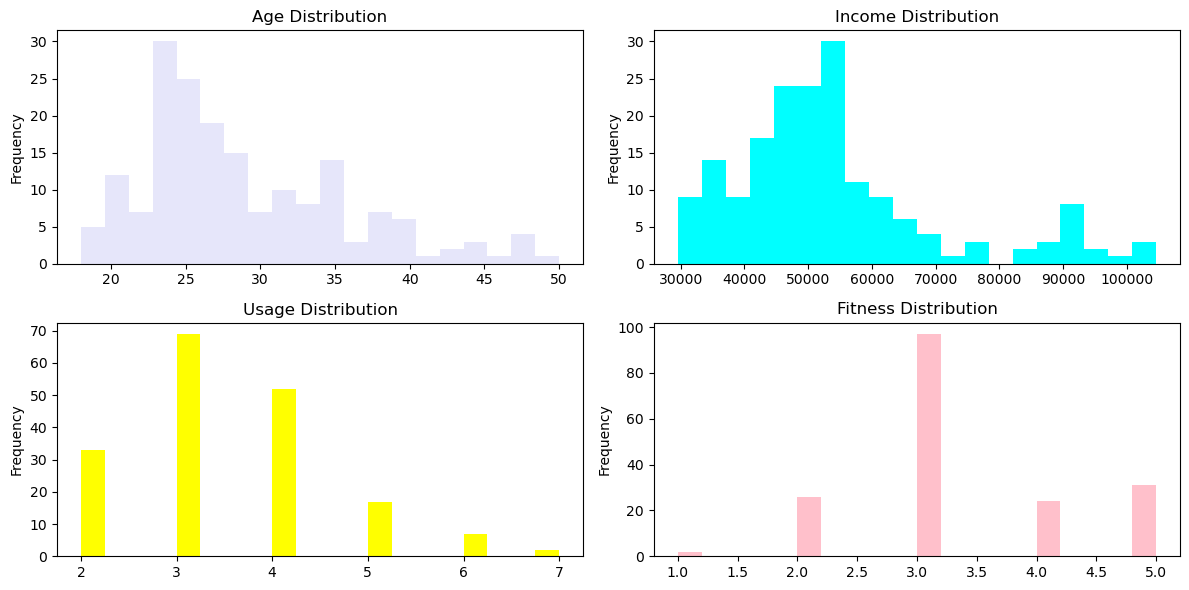

In [66]:
# Product Preference Analysis

pp=df1.groupby('Product')[['Age','Income','Fitness','Usage']].mean()


# Visualization
plt.figure(figsize=(12,6))

# Age Distribution
plt.subplot(2, 2, 1)
df1['Age'].plot(kind='hist', bins=20,color='lavender')
plt.title('Age Distribution')

# Income Distribution
plt.subplot(2, 2, 2)
df1['Income'].plot(kind='hist', bins=20,color='cyan')
plt.title('Income Distribution')

# Usage Distribution
plt.subplot(2, 2, 3)
df1['Usage'].plot(kind='hist', bins=20,color='yellow')
plt.title('Usage Distribution')

# Fitness Distribution
plt.subplot(2, 2, 4)
df1['Fitness'].plot(kind='hist', bins=20,color='pink')
plt.title('Fitness Distribution')

plt.tight_layout()
plt.show()


In [67]:
# Targeting Recommendations
rec = []
for Product in df1['Product'].unique():
    pd = df1[df1['Product'] == Product]
    rec.append((Product, pd['Age'].mean(), pd['Income'].mean(), pd['Usage'].mean(), pd['Fitness'].mean()))

# Sorting recommendations by income
rec.sort(key=lambda x: x[2], reverse=True)

print("Targeting Recommendations:")
for Product, Age, Income, Usage, Fitness in rec:
    print(f"Product {Product}: Target customers with Age {Age:.2f}, Income {Income:.2f}, Usage {Usage:.2f}, Fitness {Fitness:.2f}")



Targeting Recommendations:
Product TM798: Target customers with Age 29.10, Income 75441.57, Usage 4.78, Fitness 4.62
Product TM498: Target customers with Age 28.90, Income 48973.65, Usage 3.07, Fitness 2.90
Product TM195: Target customers with Age 28.55, Income 46418.03, Usage 3.09, Fitness 2.96
